In [1]:
# This notebook was adapted from the notebook used in the specialization in Reinforcement Learning 
# from Alberta University, available in Coursera

from experiment_util import *
import experiment_util

import sys

sys.path.append("../Common")
from RL.agents import DynaQPlusAgent
from RL.environments import SimulatedEnv

def change_environment(env):
    env.map[2][-1] = 0  # opens another corridor on the other end of row 2

env = SimulatedEnv()
shape_env = (len(env.map), len(env.map[0]))
#change_environment(env)
#print(env.map)

set_results_dir("results-stepcost") # from experiment_util

results-stepcost/


# About this Notebook

Common to all experiments in this notebook: 
- **agents** tested are **Dyna-Q** and **Dyna-Q+** with varied parameters
- **environment** is basicaly the *SimulatedEnv* with the default 5x7 map; the map has a single cell changed in some experiments
- **reward model** of the environment is *step_cost*, i.e. 0 when arrive in a goal cell, and -1 in all other steps

# 1. Dyna-Q in Static Environment
## 1.1 Basic Version

In [27]:

# Experiment parameters
experiment_parameters = {
    "num_runs" : 50, #30         # Number of times we run the experiment
    "num_episodes" : 40,         # Number of episodes per experiment
}

# Environment parameters 
env_parameters = {
    "count_visits" : False,
    "reward_option" : 'step_cost', 
    "allow_all_actions" : False
}

# Agent parameters
agent_parameters = {  
    "gamma": 0.95,
    "epsilon": 0.1, 
    "alpha" : 0.85,                   # Best value return by Optuna: 0.85
    "planning_steps" : [0, 5, 50],    # The list of planning_steps we want to try
    "kappa" : 0.0,                    # To behave as Dyna-Q
    "model_option" : 'transition',
    "default_q" : 0.0
}

current_env = SimulatedEnv
current_agent = DynaQPlusAgent

run_episodes(current_env, current_agent, 
    env_parameters, agent_parameters, experiment_parameters,
    'planning_steps', 
    'Dyna-Q_planning_steps.npy')

WITH planning_steps = 0
100%|██████████| 50/50 [00:04<00:00, 12.29it/s]
WITH planning_steps = 5
100%|██████████| 50/50 [00:05<00:00,  9.50it/s]
WITH planning_steps = 50
100%|██████████| 50/50 [00:22<00:00,  2.27it/s]


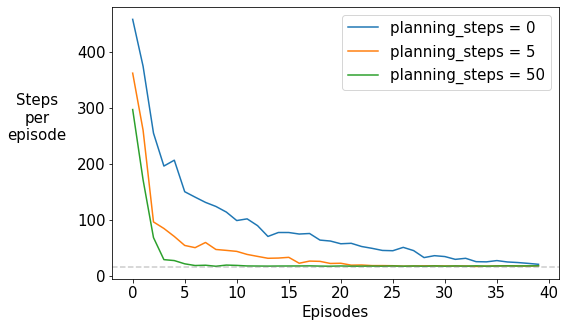

In [28]:
plot_steps_per_episode('Dyna-Q_planning_steps.npy')

## 1.2 Extra: Using Optimism 

### Optimistic State-Value

In [4]:

# Experiment parameters
experiment_parameters = {
    "num_runs" : 30,             # The number of times we run the experiment
    "num_episodes" : 40          # The number of episodes per experiment
}

# Environment parameters 
env_parameters = {
    "count_visits" : False,
    "reward_option" : 'step_cost', 
    "allow_all_actions" : False
}

# Agent parameters
agent_parameters = {  
    "gamma": 0.95,
    "epsilon": 0.1, 
    "alpha" : 0.85,
    "planning_steps" : 10,
    "kappa" : 0.0,                      # To behave as Dyna-Q
    "model_option" : 'transition',
    "default_q" : [-1.0, 0.0, 1.0]      # List of values to test -- ALL are optimistic values
}

current_env = SimulatedEnv
current_agent = DynaQPlusAgent

run_episodes(current_env, current_agent, 
    env_parameters, agent_parameters, experiment_parameters,
    'default_q', 
    'Dyna-Q_optimistic_q.npy')

WITH default_q = -1.0
100%|██████████| 30/30 [00:04<00:00,  6.59it/s]
WITH default_q = 0.0
100%|██████████| 30/30 [00:04<00:00,  6.10it/s]
WITH default_q = 1.0
100%|██████████| 30/30 [00:04<00:00,  6.35it/s]


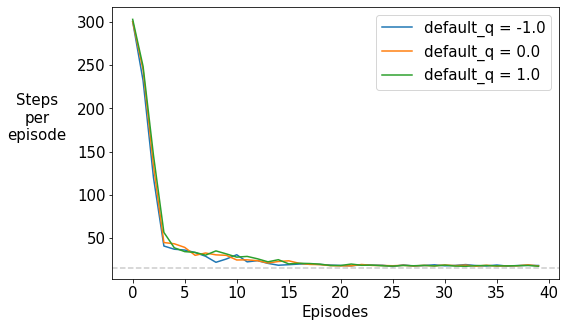

In [5]:
plot_steps_per_episode('Dyna-Q_optimistic_q.npy')

### Optimistic Model

In [25]:

# Experiment parameters
experiment_parameters = {
    "num_runs" : 30,             # The number of times we run the experiment
    "num_episodes" : 40          # The number of episodes per experiment
}

# Environment parameters 
env_parameters = {
    "count_visits" : False,
    "reward_option" : 'step_cost', 
    "allow_all_actions" : False
}

# Agent parameters
agent_parameters = {  
    "gamma": 0.95,
    "epsilon": 0.1, 
    "alpha" : 0.85,
    "planning_steps" : 10,
    "kappa" : 0.0,                    # To behave as Dyna-Q
    "model_option" : ['transition', 'transition+', 'optimistic_transition+'],  #, 'all'],
    "default_q" : 0.0
}

current_env = SimulatedEnv
current_agent = DynaQPlusAgent

run_episodes(current_env, current_agent, 
    env_parameters, agent_parameters, experiment_parameters,
    'model_option', 
    'Dyna-Q_optimistic_model.npy')

WITH model_option = transition
100%|██████████| 30/30 [00:04<00:00,  6.73it/s]
WITH model_option = transition+
100%|██████████| 30/30 [00:04<00:00,  6.67it/s]
WITH model_option = optimistic_transition+
100%|██████████| 30/30 [00:07<00:00,  4.10it/s]


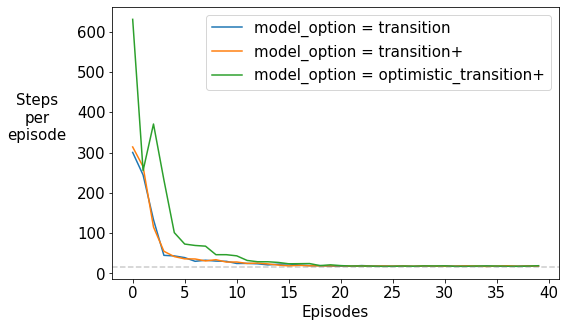

In [26]:
plot_steps_per_episode('Dyna-Q_optimistic_model.npy')

# 2. Dyna-Q in Dynamic Environment

## 2.1 Experiment with Varying Planning Steps

In [8]:
# Experiment parameters
experiment_parameters = {
    "num_runs" : 10,                   # The number of times we run the experiment
    "num_max_steps" : 10000,           # The number of steps per experiment
    "count_visits" : True,
    "change_at_n" : 5000,                         # Time step where the environment will change
    "env_changer_procedure" : change_environment  # Procedure to change the environment 
}

# Environment parameters
environment_parameters = { 
    "count_visits" : False,
    "reward_option" : 'step_cost', 
    "allow_all_actions" : False,
    "use_real_state" : True
}

# Agent parameters
agent_parameters = {  
    "epsilon": 0.1, 
    "gamma": 0.95,
    "alpha" : 0.85,
    "kappa" : 0.0,
    "planning_steps" : [5, 10, 50],             # The list of planning_steps we want to try
    "model_option" : 'transition'               # With 'all' or 'transition': lines aprox parallel
}

current_env = SimulatedEnv
current_agent = DynaQPlusAgent

run_num_steps(
    current_env, current_agent, 
    environment_parameters, agent_parameters, experiment_parameters,
    "planning_steps",
    "Dyna-Q_shortcut_steps")

WITH planning_steps = 5
100%|██████████| 10/10 [00:06<00:00,  1.61it/s]
WITH planning_steps = 10
100%|██████████| 10/10 [00:09<00:00,  1.11it/s]
WITH planning_steps = 50
100%|██████████| 10/10 [00:33<00:00,  3.37s/it]


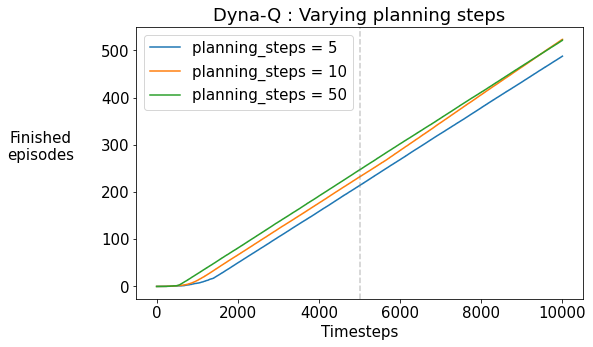

In [9]:
plot_results_per_step('Dyna-Q_shortcut_steps.npy', 
    'Dyna-Q : Varying planning steps', 
    'finished_episodes',
    'Finished\nepisodes')

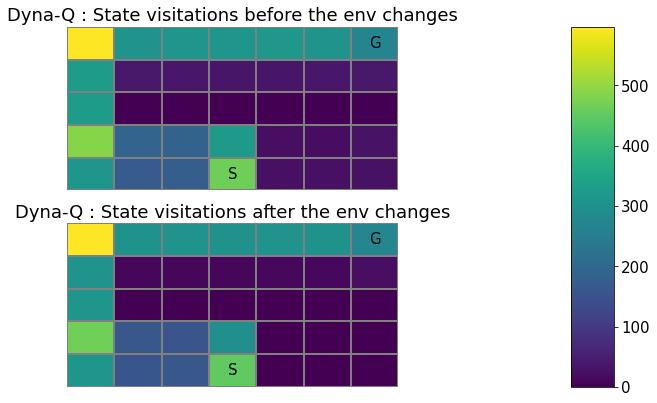

In [10]:
plot_state_visitations(
    "Dyna-Q_shortcut_steps.npy", 
    ['Dyna-Q : State visitations before the env changes', 'Dyna-Q : State visitations after the env changes'],
    2, shape_env) # index 2 is Dyna-Q with 50 planning steps


## 2.2 Experiment with Varying Epsilons

In [11]:
# Experiment parameters
experiment_parameters = {
    "num_runs" : 20,           # The number of times we run the experiment
    "num_max_steps" : 10000,   # The number of steps per experiment
    "count_visits" : False,
    "change_at_n" : 5000,                         # Time step where the environment will change
    "env_changer_procedure" : change_environment  # Procedure to change the environment 
}

# Environment parameters
environment_parameters = { 
    "count_visits" : False,
    "use_real_state" : True,
    "reward_option" : 'step_cost', 
    "allow_all_actions" : False
}

# Agent parameters
agent_parameters = {  
    "alpha" : 0.85,
    "gamma": 0.95,
    "planning_steps" : 10,             # Obs.: with more steps, results are similar
    "kappa" : 0.0,
    "epsilon": [0.1, 0.2, 0.4, 0.8],   # The list of epsilons we want to try
    "model_option" : 'transition'
}

current_env = SimulatedEnv
current_agent = DynaQPlusAgent

'''run_num_steps(current_env, current_agent, 
    environment_parameters, agent_parameters, experiment_parameters,
    'epsilon',
    'Dyna-Q_epsilons')'''

"run_num_steps(current_env, current_agent, \n    environment_parameters, agent_parameters, experiment_parameters,\n    'epsilon',\n    'Dyna-Q_epsilons')"

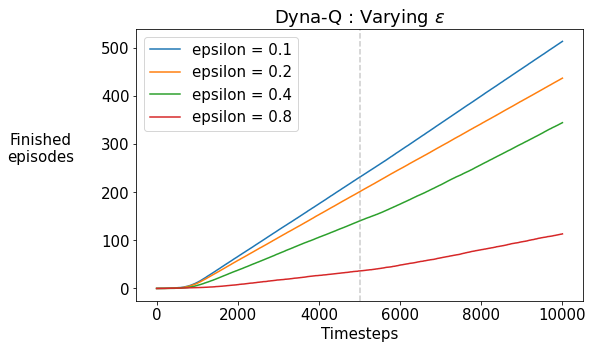

In [12]:
plot_results_per_step('Dyna-Q_epsilons.npy',
    r'Dyna-Q : Varying $\epsilon$',
    'finished_episodes', 
    'Finished\nepisodes')

# 3. Dyna-Q+ in Dynamic Environment

In [13]:
# Experiment parameters
experiment_parameters = {
    "num_runs" : 30,                     # The number of times we run the experiment
    "num_max_steps" : 10000,             # The number of steps per experiment
    "count_visits" : True,
    "change_at_n" : 5000,                         # Time step where the environment will change
    "env_changer_procedure" : change_environment  # Procedure to change the environment 
}

# Environment parameters
environment_parameters = { 
    "count_visits" : False,
    "use_real_state" : True,
    "reward_option" : 'step_cost', 
    "allow_all_actions" : False
}

# Agent parameters
agent_parameters = {  
    "gamma": 0.95,
    "epsilon": 0.1, 
    # parametrizacao obtida com o Optuna
    "alpha" : 0.85,             # Optuna deu 0.9
    "planning_steps" : [50],    # more values may be added
    "kappa" : 0.00727,
    "model_option" : 'transition'
}

current_env = SimulatedEnv
current_agent = DynaQPlusAgent

run_num_steps(current_env, current_agent, 
    environment_parameters, agent_parameters, experiment_parameters,
    "planning_steps",
    "Dyna-Q+")

WITH planning_steps = 50
100%|██████████| 30/30 [01:40<00:00,  3.36s/it]


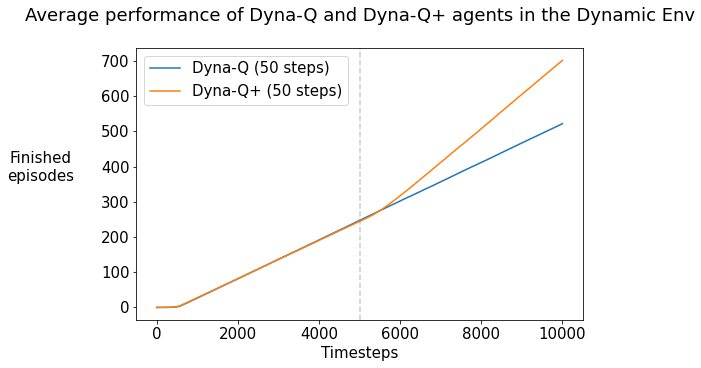

In [14]:
plot_results_comparison(
    'Dyna-Q_shortcut_steps.npy', 
    'Dyna-Q+.npy', 
    agent_parameters['planning_steps'],
    'finished_episodes',
    'Finished\nepisodes')

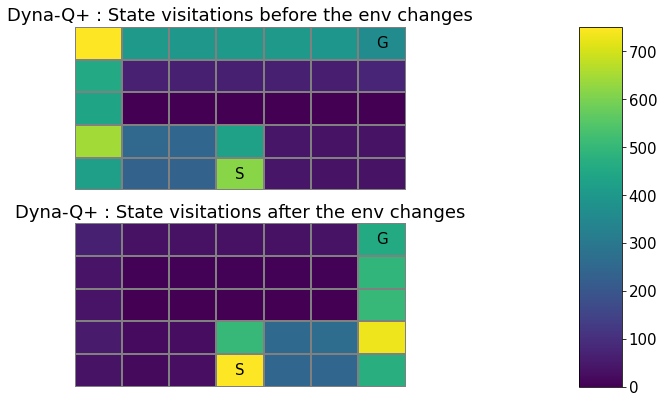

In [15]:
plot_state_visitations(
    'Dyna-Q+.npy', 
    ['Dyna-Q+ : State visitations before the env changes', 
    'Dyna-Q+ : State visitations after the env changes'], 
    len(agent_parameters['planning_steps'])-1,   # last index: DynaQ+ with the most steps
    shape_env)  

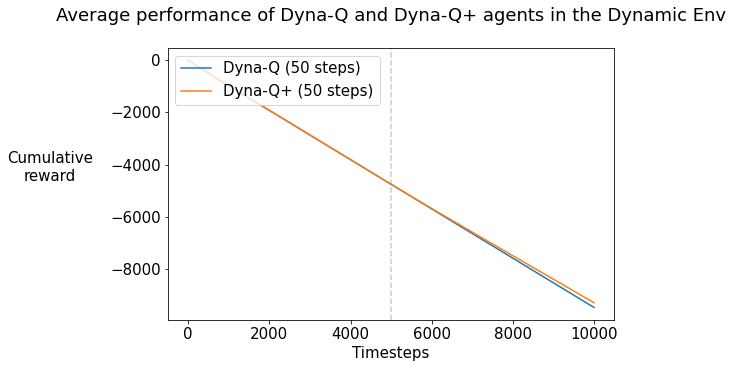

In [16]:
# Plots cumulative reward -- not useful with reward option 'step_cost'
plot_results_comparison(
    'Dyna-Q_shortcut_steps.npy', 
    'Dyna-Q+.npy', 
    agent_parameters['planning_steps']) 